In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns
import scipy.optimize as opt

In [21]:
data = loadmat('/home/teemo/ML/data/ex5data1.mat')
X,y,Xval,yval,Xtest,ytest = map(np.ravel,[data['X'],data['y'],data['Xval'],data['yval'],data['Xtest'],data['ytest']])
X.shape,y.shape,Xval.shape,yval.shape,Xtest.shape,ytest.shape

((12,), (12,), (21,), (21,), (21,), (21,))

<function matplotlib.pyplot.show(close=None, block=None)>

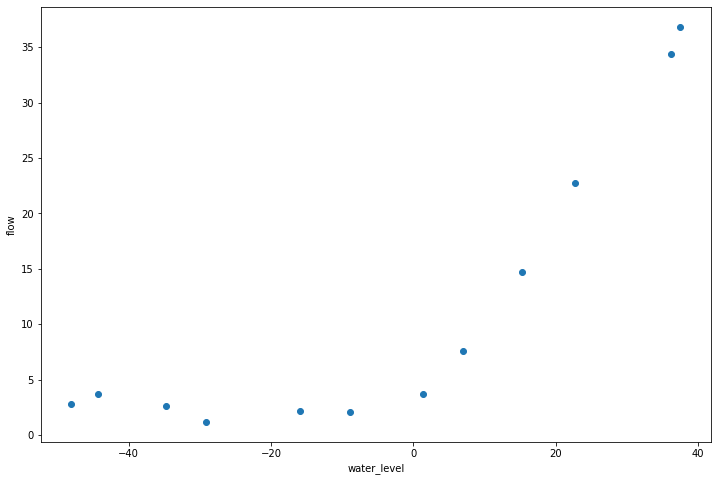

In [22]:
fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(X,y)
ax.set_xlabel('water_level')
ax.set_ylabel('flow')
plt.show

In [23]:
X, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]
X.shape, Xval.shape, Xtest.shape

((12, 2), (21, 2), (21, 2))

In [24]:
def cost(theta,X,y):
    m = X.shape[0]
    
    inner  = X @ theta - y 
    
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)
    
    return cost
    

In [25]:
#正则化线性回归代价函数
def costReg(theta,X,y,reg = 1):
    m = X.shape[0]
    regularized_term = (reg / (2 * m)) * np.power(theta[1:],2).sum()
    return cost(theta,X,y) + regularized_term
    
    

In [26]:
theta = np.ones(X.shape[1])
costReg(theta,X,y,1)

303.9931922202643

In [27]:
#正则化线性回归的梯度
def gradient(theta,X,y):
    m = X.shape[0]
    
    inner = X.T @(X @ theta - y)
    return inner / m

In [28]:
def gradientReg(theta,X,y,reg):
    m = X.shape[0]
    
    regularized_term = theta.copy()
    regularized_term[0] = 0
    
    regularized_term = (reg / m) * regularized_term
    
    return gradient(theta,X,y) + regularized_term
    
    

In [29]:
gradientReg(theta,X,y,1)

array([-15.30301567, 598.25074417])

In [35]:
#拟合线性回归
theta = np.ones(X.shape[1])
final_theta = opt.minimize(fun=costReg,x0=theta,args=(X,y,0),method='TNC',jac=gradientReg)
final_theta['x'][0]

13.087903481226347

<function matplotlib.pyplot.show(close=None, block=None)>

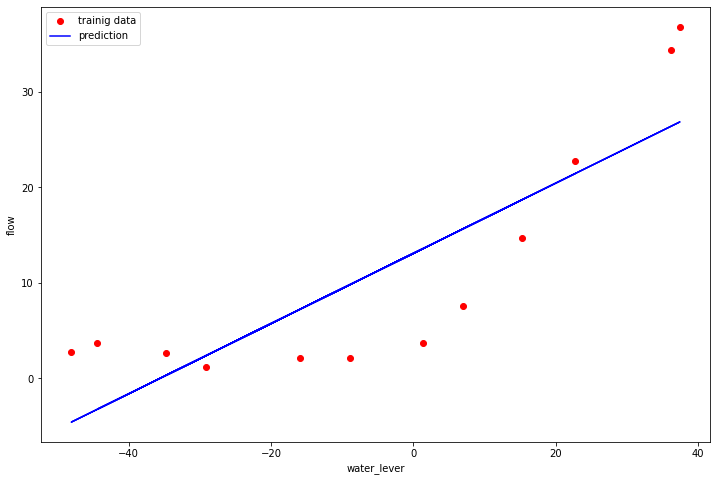

In [37]:
b = final_theta['x'][0]
m = final_theta['x'][1]

fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(X[:,1],y,c='r',label="trainig data")
plt.plot(X[:,1],X[:,1] * m + b,c='b',label="prediction")
ax.set_xlabel('water_lever')
ax.set_ylabel('flow')
ax.legend()
plt.show

In [41]:
def linear_regression(X, y, l=1):
    """linear regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        l: lambda constant for regularization

    return: trained parameters
    """
    # init theta
    theta = np.ones(X.shape[1])

    # train it
    res = opt.minimize(fun=costReg,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=gradientReg)
    return res

In [42]:
training_cost, cv_cost = [], []

In [43]:
m = X.shape[0]
for i in range(1, m+1):
    res = linear_regression(X[:i, :], y[:i], 0)
    
    tc = costReg(res.x, X[:i, :], y[:i], 0)
    cv = costReg(res.x, Xval, yval, 0)
   
    training_cost.append(tc)
    cv_cost.append(cv)

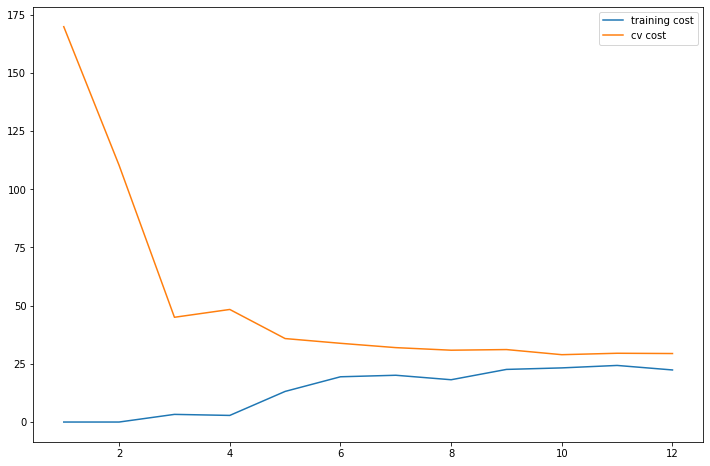

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(1, m+1), training_cost, label='training cost')
plt.plot(np.arange(1, m+1), cv_cost, label='cv cost')
plt.legend()
plt.show()